In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
import asyncio
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
        
# Dataset: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [14]:
# Config
pd.options.display.max_rows = 10
pd.set_option("min_rows", 20)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns',None)

path = './data'
# print(os.listdir(path))

songs = pd.read_csv(path+'/merge.csv')
# songs["duration_s"] = songs.duration_ms.apply(lambda x : round(x/1000))
# songs.drop("duration_ms", axis=1, inplace=True)
print(songs)

                           id  \
0      7iN1s7xHE4ifF5povM6A48   
1      6QhXQOpyYvbpdbyjgAqKdY   
2      2BhrrVRC8CoiWejbzj0VjQ   
3      3Bh6uInhcVBVvLraGZdkKD   
4      6UkMcAA19lTdjs22jtB7o2   
5      5LxvwujISqiB8vpRYv887S   
6      0NgFZWdvnv218PVnY4I8UT   
7      50q2aUjWoTn6CJIfSPRJQA   
8      2eF8pWbiivYsYRpbntYsnc   
9      5Ts1DYOuouQLgzTaisxWYh   
...                       ...   
47990  1000nHvUdawXuUHgBod4Wv   
47991  0rIAC4PXANcKmitJfoqmVm   
47992  132ALUzVLmqYB4UsBj5qD6   
47993  6V7g6qM8wheMivMWrzbPTM   
47994  5KBARWIxeMGkvUax9VtVC9   
47995  7AODNxFNPnKaz4hURLzw5l   
47996  44ADyYoY5liaRa3EOAl4uf   
47997  2KKijf6Ett4kmVNJze2roh   
47998  2bjUEg4jBtKBlPdNrTAppI   
47999  3cWI6Hj9LQ0MfMuhw9uSMc   

                                                 title  \
0                          Let It Be - Remastered 2009   
1                                              Cecilia   
2                                Son of a Preacher Man   
3                                 Who'll 

In [3]:
# Standard Pitch Class notation, e.g. 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.
print('Common keys: \n', songs['key'].value_counts().sort_values(ascending=False))

# Artists with multiple appearances
artists = songs['artist'].value_counts()
print('Common artists: \n', artists.sort_values(ascending=False))

# Some artist's popularity over the years

# Group sth with some features and sort with valence
# def group_by_features(group, features):
#     # unpack categories
#     return songs[group, features].groupby(group).mean().sort_values(by='valence', ascending=False)[:10]

# print(group_by_features('genre', ('valence', 'key')))

Common keys: 
 1     267
11    199
0     198
7     197
5     182
8     173
2     158
9     157
6     154
10    129
4     126
3      60
Name: key, dtype: int64
Common artists: 
 Rihanna             25
Drake               23
Eminem              21
Calvin Harris       20
Britney Spears      19
David Guetta        18
Chris Brown         17
Kanye West          17
Beyoncé             16
Taylor Swift        16
                    ..
Bon Jovi             1
Flipp Dinero         1
Dave                 1
Young T & Bugsey     1
Stormzy              1
Tones And I          1
Pedro Capó           1
Lil Tecca            1
Lunay                1
Blanco Brown         1
Name: artist, Length: 835, dtype: int64


In [4]:
songs.info()
songs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   explicit          2000 non-null   bool   
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   danceability      2000 non-null   float64
 6   energy            2000 non-null   float64
 7   key               2000 non-null   int64  
 8   loudness          2000 non-null   float64
 9   mode              2000 non-null   int64  
 10  speechiness       2000 non-null   float64
 11  acousticness      2000 non-null   float64
 12  instrumentalness  2000 non-null   float64
 13  liveness          2000 non-null   float64
 14  valence           2000 non-null   float64
 15  tempo             2000 non-null   float64
 16  genre             2000 non-null   object 


,count,mean,std,min,25%,50%,75%,max
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667437,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512435,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976
instrumentalness,2000.0,0.015226,0.087771,0.000000,0.00000,0.00000,0.000068,0.985


Tracks with explicit content: 
                    artist                                               song  \
5                   Sisqo                                         Thong Song   
6                  Eminem                                The Real Slim Shady   
19                Dr. Dre                                   The Next Episode   
23                 M.O.P.                                        Cold as Ice   
27                Da Brat                       What'chu Like (feat. Tyrese)   
30                    DMX                                           Party Up   
37                  JAY-Z                                        Big Pimpin'   
43                Dr. Dre                                   Forgot About Dre   
44          Missy Elliott                                           Hot Boyz   
53                  Sisqo                                         Incomplete   
...                   ...                                                ...   
1971    

<AxesSubplot:title={'center':'Liveness changes over year'}, xlabel='year'>

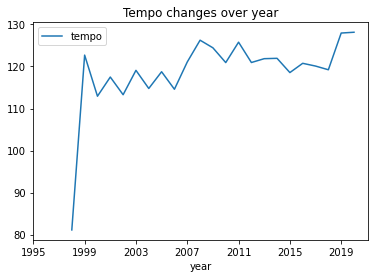

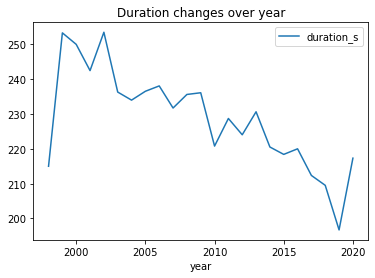

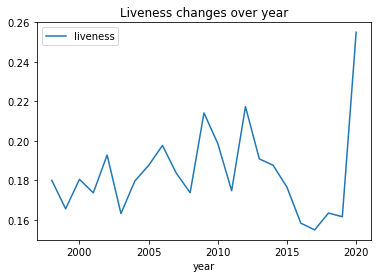

In [5]:
explicit = songs[(songs['explicit'] == True)]
print('Tracks with explicit content: \n', explicit)

def get_average_x_by_y(x, y, sort):
    print('Average', str(x), 'by', str(y)+'s:',)
    if (sort==True):
        return (songs.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (songs.groupby([y]).agg({str(x):'mean'}))

print(get_average_x_by_y('tempo', 'genre', True))
print(get_average_x_by_y('tempo', 'artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Tempo changes over year", xticks=range(1995, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Liveness changes over year")

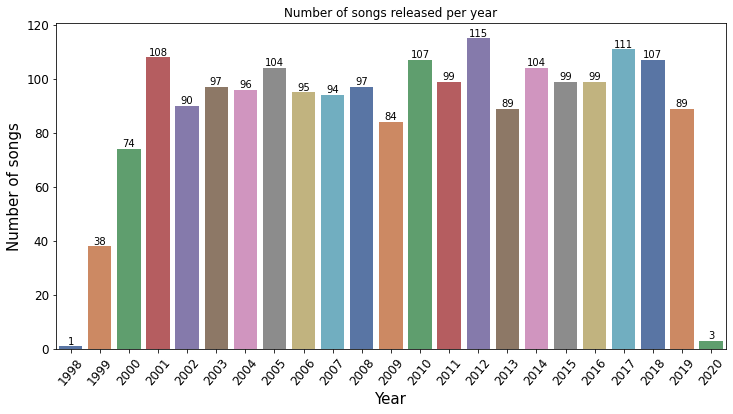

In [6]:
# Number of songs over years
songs_per_year = (songs.year.value_counts().rename_axis('year').reset_index(name = 'songs'))

plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)

plt.show()

# Bar chart of keys

# Pie Chart: explicit, mode


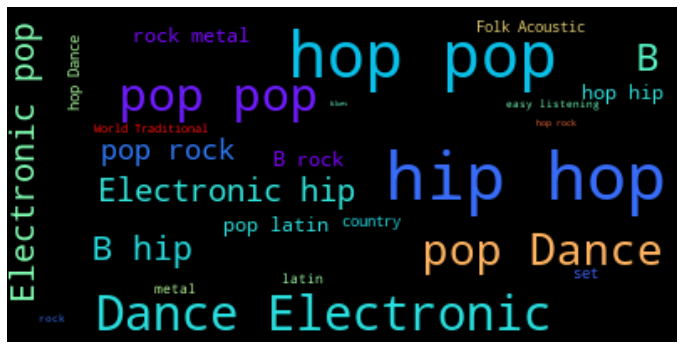

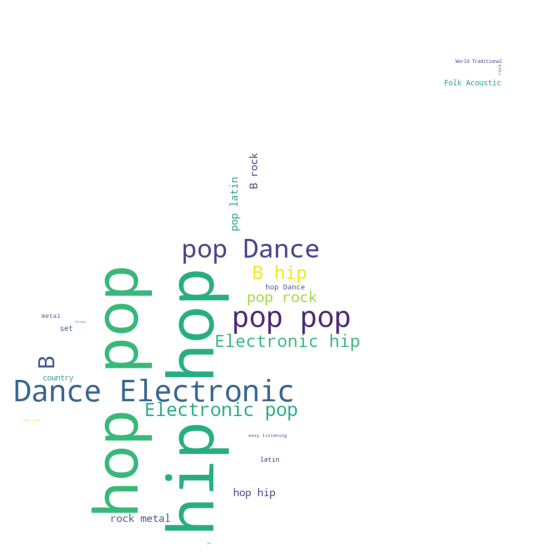

In [7]:
# # Explore data about pop with scatterplot
# pop = []

# for i in range (0,2000):
#     if songs.iloc[i]["genre"] == "pop":
#         pop.append(songs.iloc[i]["artist"])

# pop = np.array(pop)
# pop.shape
# sns.scatterplot(x="popularity", y="duration_s", data=songs)

# Wordcloud of genres (https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5)
from matplotlib import rcParams
genre_list = songs['genre'].to_list()

# https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/
genres = ' '.join(map(str,genre_list))

rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# Image wordcloud
from PIL import Image
mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(background_color='white', max_words=200,
                     mask=mask).generate(genres)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:>

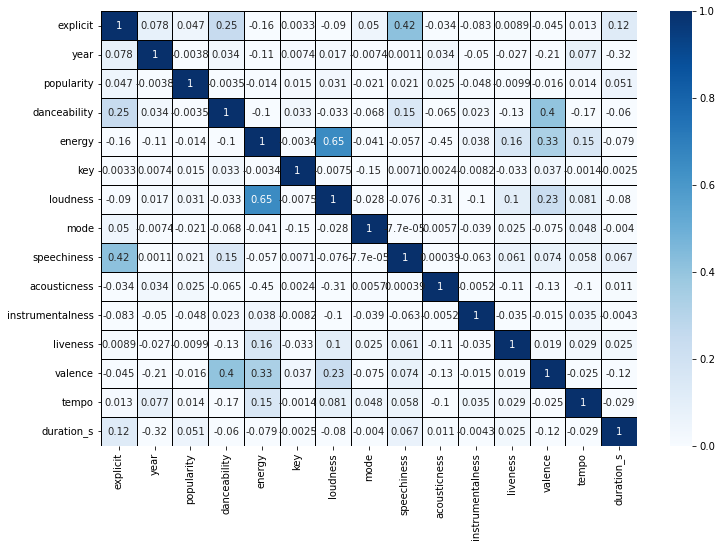

In [8]:
# Correlation between features demonstrated in heatmap
features = songs.drop(["artist", "song"], axis=1)
corr = features.corr()
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

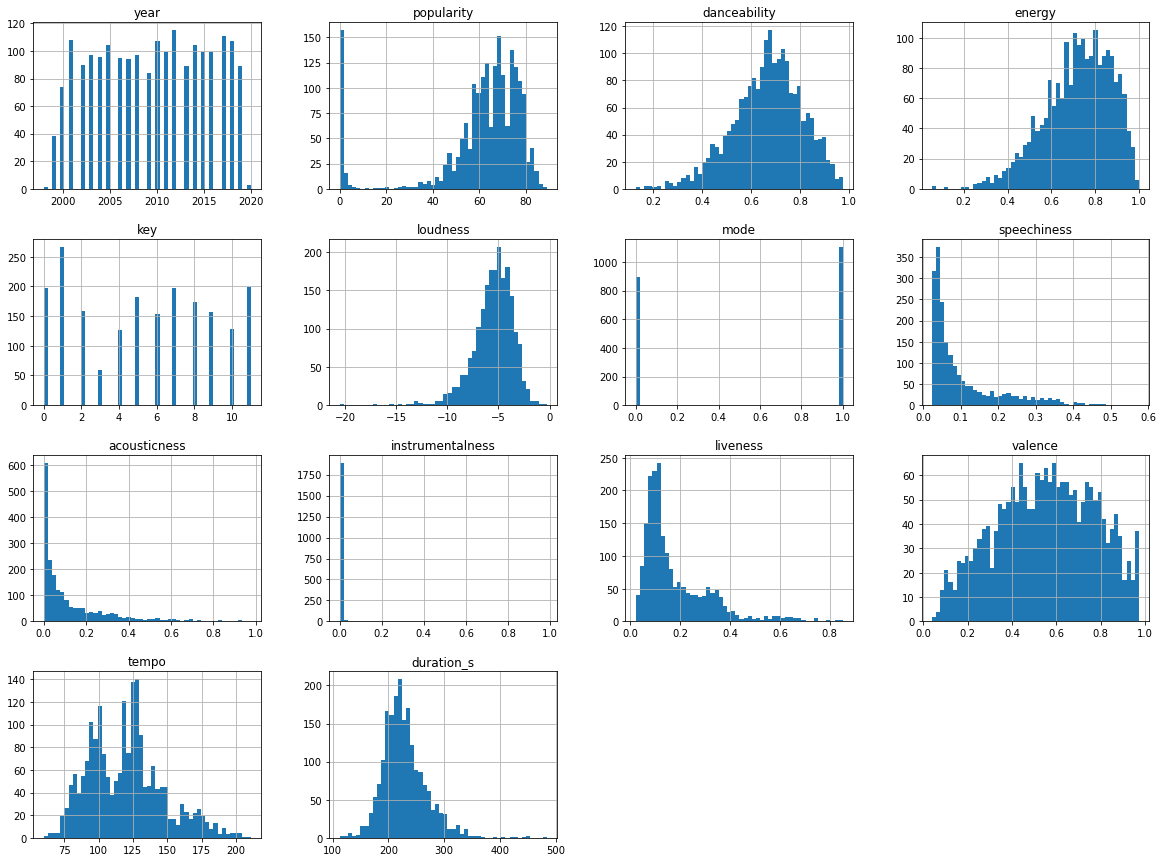

In [9]:
# Histogram for quantifiable features

# fig, axes = plt.subplots(len(songs.columns), 1)
# plt.figure(figsize=(12,12))
# # https://stackoverflow.com/questions/57602524/print-multiple-separate-histograms-in-one-loop
# for column in songs.columns:
#     i = songs.columns.get_loc(column)
#     a = np.array(songs.iloc[:, i])
#     if(songs[column].dtypes == np.int64 or songs[column].dtypes == np.float64):
#         print('Histogram for', column)
#         axes[i].hist(a) 

songs.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 0, 'Average popularity')

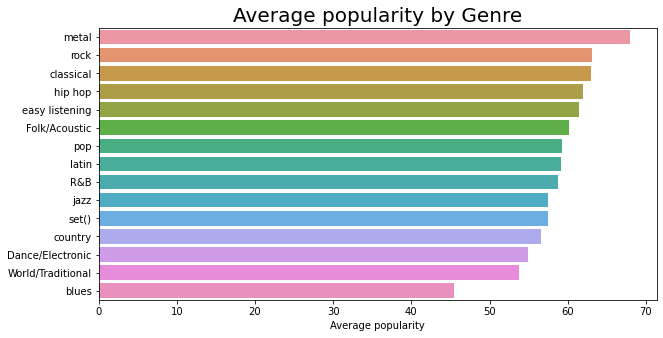

In [10]:
# Explode the genre column
songs.genre = songs.genre.apply(lambda x: x.split(", "))
df_genre_exp = songs.explode("genre")

# Craft "genres" DataFrame
genre_cols = df_genre_exp.columns.values[4:-1] #From popularity to duration_s
genre_cols = np.append(genre_cols, ["explicit"])
genres = df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()
#See results
genres.head()

# Popularity by genres
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

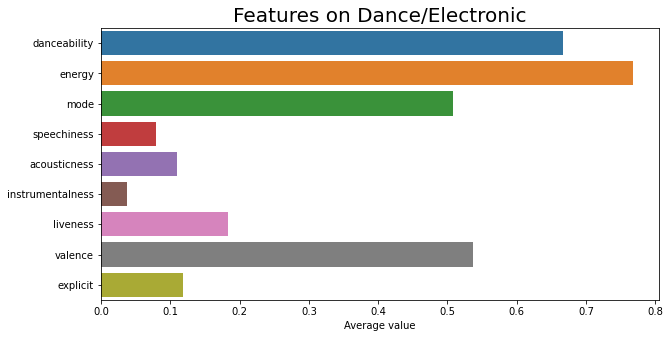

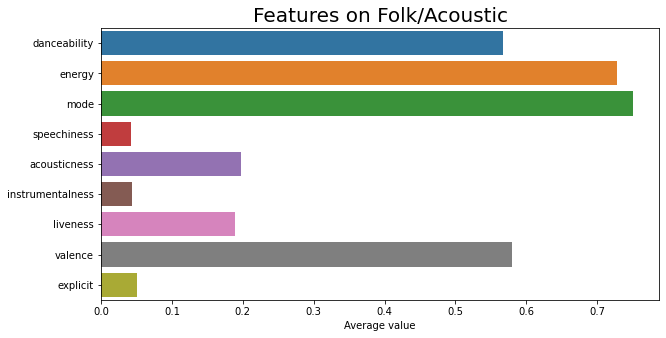

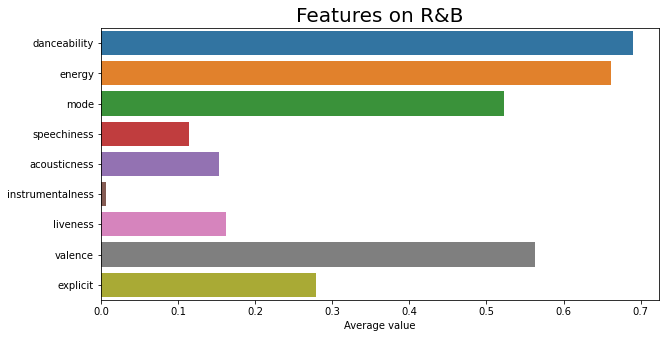

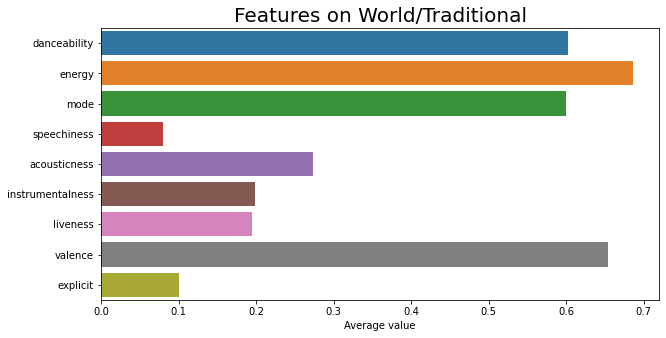

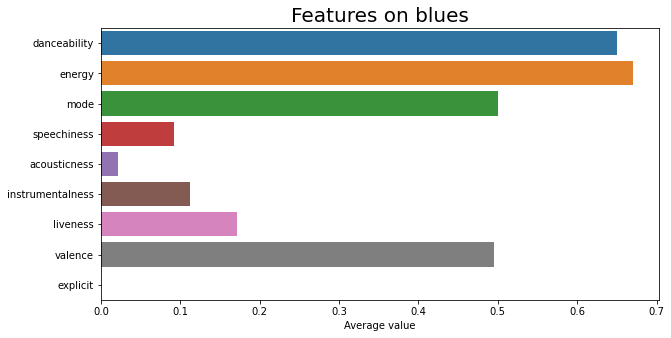

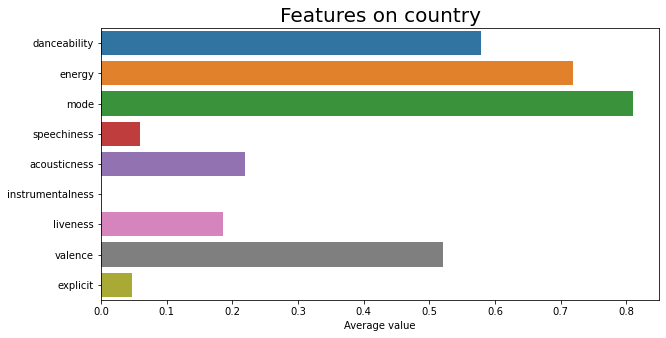

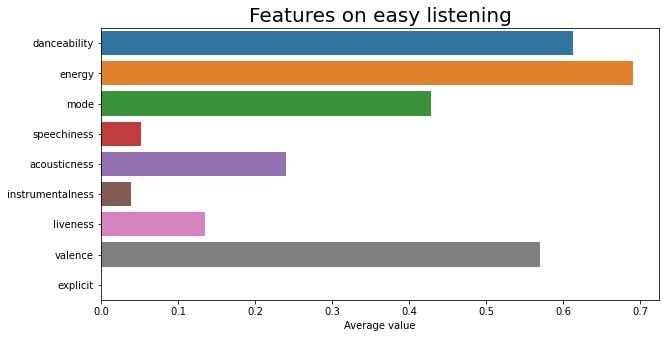

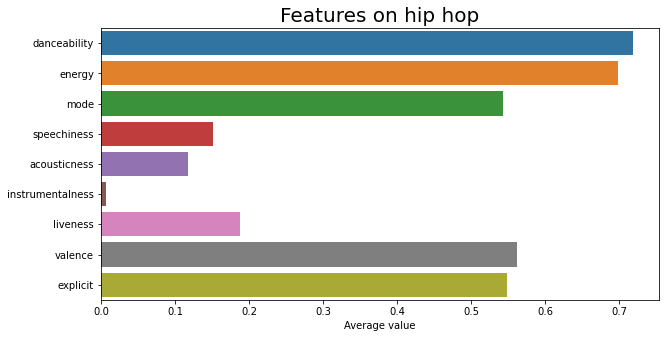

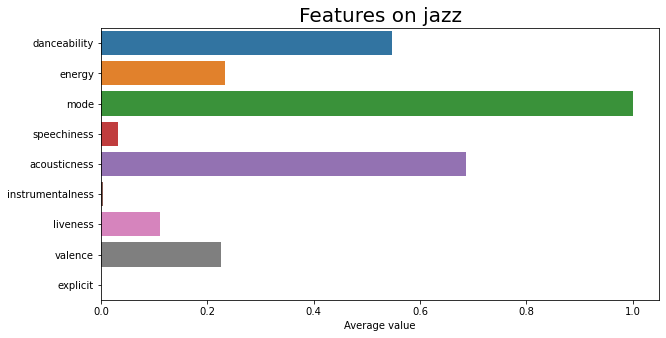

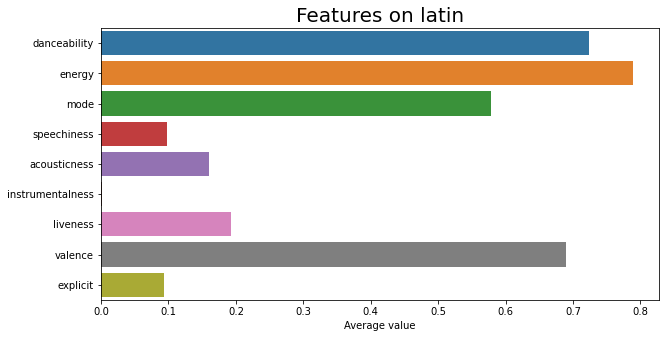

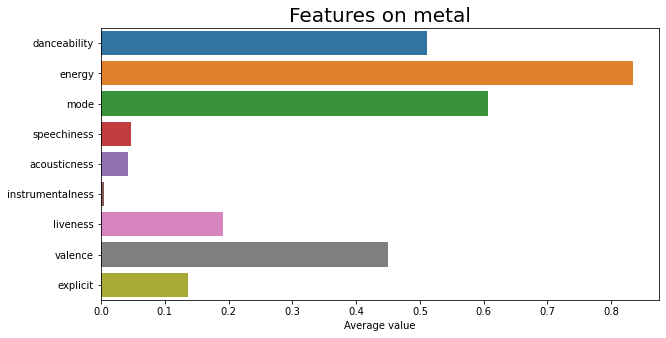

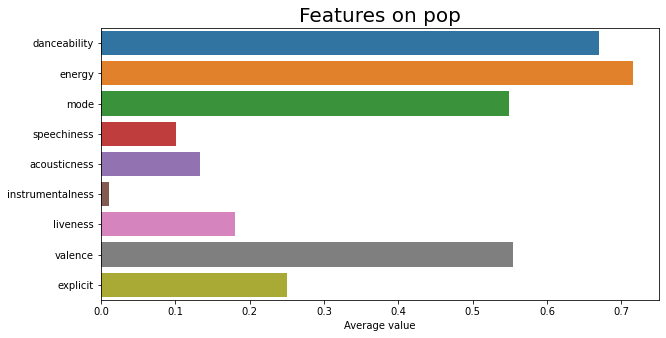

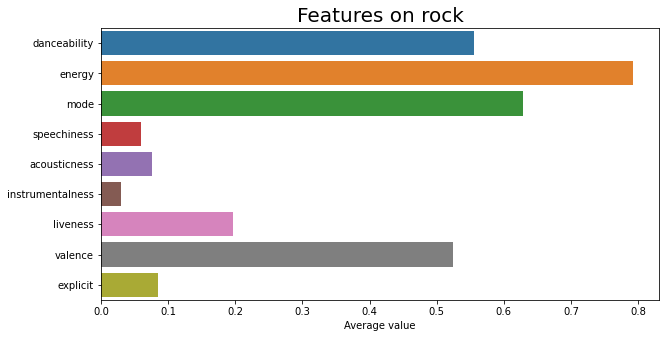

In [11]:
#Average features by genre
#Exclude "classical" and "set()"
genre_num_songs = df_genre_exp.groupby("genre").size().reset_index()
genre_num_songs.columns = ["genre", "songs"]
genre_num_songs.drop(genre_num_songs[genre_num_songs.genre.isin(["classical", "set()"])].index.values, inplace=True)
valid_genres = genre_num_songs.genre.values

for genre in valid_genres:
    data = genres.drop(["popularity"], axis=1)[genres.genre == genre]
    #Exclude features with different scales
    data = data.drop(["genre", "tempo",
                      "key", "loudness"], axis=1).transpose().reset_index()
    data.columns = ["feature", "value"]
    
    # Consider features on each genre
    plt.clf()
    ax = sns.barplot(x="value", y="feature", data=data)
    ax.set_xlabel("Average value")
    ax.set_ylabel("")
    ax.set_title("Features on " + genre, fontsize=20)
    
    plt.show()

In [29]:
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ str(artistname2) + '-' + str(songname2) + '-' + 'lyrics')
#     if page response = 404
    html = BeautifulSoup(page.text, 'html.parser')
#     lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")
#     if lyrics1:
#         lyrics = lyrics1.get_text()
#     elif lyrics2:
#         lyrics = lyrics2.get_text()
#     elif lyrics1 == lyrics2 == None:
#         lyrics = None

    if lyrics2: 
        lyrics = lyrics2.text
    elif lyrics2 == None:
        lyrics = None
        
    return lyrics

# print(scrape_lyrics('Eminem', 'Lose Yourself'))

# def lyrics_onto_frame(artist_name):
#     for i,x in enumerate(songs['song'].to_list()):
#         lyrics_str = scrape_lyrics(str(artist_name), str(x))
#         songs.loc[i, 'lyrics'] = lyrics_str

def lyrics_onto_frame(artist_name):
    for i,x in enumerate(songs[songs['artist'] == str(artist_name)]['song'].to_list()):
        lyrics_str = scrape_lyrics(str(artist_name), str(x))
        songs.loc[songs.index[songs['artist'] == str(artist_name)][i], 'lyrics'] = lyrics_str


# for artist in songs['artist']:
#     lyrics_onto_frame(str(artist))

lyrics_onto_frame('Justin Bieber')

# for i,x in enumerate(songs[songs['artist'] == 'Post Malone']['song'].to_list()):
#     print('index', i, 'song:', x)

# print(songs.index[songs['artist'] == 'Post Malone'])
    
# for i,x in enumerate(songs['song'].to_list()):
#     print('index', i, 'song:', x)

# print(songs['song'].to_list())

# songs.loc[1, 'lyrics'] = 'hello world'

# print(songs)

In [30]:
print(songs[songs['artist'] == 'Post Malone'])
# print(songs[songs['lyrics'].notnull()])
# ConnectionError: HTTPSConnectionPool(host='genius.com', port=443): Max retries exceeded with url: /Faith-Hill-Better-lyrics (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002169ECBB100>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


           artist                                           song  explicit  \
1769  Post Malone                                Congratulations      True   
1801  Post Malone                     rockstar (feat. 21 Savage)      True   
1861  Post Malone                                     Better Now      True   
1899  Post Malone                   Psycho (feat. Ty Dolla $ign)      True   
1904  Post Malone  Sunflower - Spider-Man: Into the Spider-Verse     False   
1933  Post Malone                                           Wow.      True   
1984  Post Malone                                     Better Now      True   
1994  Post Malone                    Goodbyes (Feat. Young Thug)      True   
1999  Post Malone                                        Circles     False   

      year  popularity  danceability  energy  key  loudness  mode  \
1769  2016          81         0.630   0.804    6    -4.183     1   
1801  2018          83         0.585   0.520    5    -6.136     0   
1861  2018  

In [20]:
# Test
URL = requests.get('https://genius.com/'+ 'Post-Malone' '-' + 'Circles' + '-' + 'lyrics')
html = BeautifulSoup(URL.text, 'html.parser')
lyrics = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")

print(lyrics.text,'\n')

def clean_lyrics(string,xWords):
    for word in xWords:
        string = string.replace(word, '')
    return string

xWords = ['[Intro]','[Verse 1]','[Verse 2]', '[Pre-Chorus]', '[Chorus]', '[Post-Chorus]']
clean_lyrics = clean_lyrics(lyrics.text, xWords)
print(clean_lyrics, '\n')

# https://stackoverflow.com/questions/31273642/better-way-to-remove-multiple-words-from-a-string
unnecessary_words = ['a', 'an', 'and', 'the', 'of']
print(' '.join(i for i in clean_lyrics.split() if i not in unnecessary_words))

[Intro]Oh, oh, ohOh,  oh, ohOh,  oh, oh, oh, oh[Verse 1]We couldn't turn around 'til we were upside downI'll be the bad guy now, but know I ain't too proudI  couldn't be there even when I triedYou  don't believe it, we do this every time[Chorus]Seasons change and our love went coldFeed  the flame 'cause we can't let goRun away, but we're running in circlesRun away, run awayI dare you to do somethingI'm  waiting on you again, so I don't take the blameRun away, but we're running in circlesRun away, run away, run away[Verse 2]Let go, I got a feeling that it's time to let goI said so, I knew that this was doomed from the get-goYou thought that it was special, specialBut it was just the sex though, the sex thoughAnd I still hear the echoes (The echoes)I got a feeling that it's time to let it go, let it go[Chorus]Seasons change and our love went coldFeed the flame 'cause we can't let goRun away, but we're running in circlesRun away, run awayI dare you to do somethingI'm waiting on you again,

In [15]:
import nltk
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

!pip install nltk textblob 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
sia.polarity_scores("This restaurant was great, but I'm not sure if I'll go there again.")

{'neg': 0.153, 'neu': 0.688, 'pos': 0.159, 'compound': 0.0276}

In [9]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

blob = TextBlob("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

blobber = Blobber(analyzer=NaiveBayesAnalyzer())

blob = blobber("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

Sentiment(classification='pos', p_pos=0.5879425317005774, p_neg=0.41205746829942275)

In [13]:
pd.set_option("display.max_colwidth", 200)

df = pd.DataFrame({'content': [
    "I love love love love this kitten",
    "I hate hate hate hate this keyboard",
    "I'm not sure how I feel about toast",
    "Did you see the baseball game yesterday?",
    "The package was delivered late and the contents were broken",
    "Trashy television shows are some of my favorites",
    "I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",
    "I find chirping birds irritating, but I know I'm not the only one",
]})

def get_scores(content):
    blob = TextBlob(content)
    nb_blob = blobber(content)
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'content': content,
        'textblob': blob.sentiment.polarity,
        'textblob_bayes': nb_blob.sentiment.p_pos - nb_blob.sentiment.p_neg,
        'nltk': sia_scores['compound'],
    })

scores = df.content.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)


,content,textblob,textblob_bayes,nltk
0,I love love love love this kitten,0.500000,-0.087933,0.957100
1,I hate hate hate hate this keyboard,-0.800000,-0.214151,-0.941300
2,I'm not sure how I feel about toast,-0.250000,0.394659,-0.241100
3,Did you see the baseball game yesterday?,-0.400000,0.613050,0.000000
4,The package was delivered late and the contents were broken,-0.350000,-0.574270,-0.476700
5,Trashy television shows are some of my favorites,0.000000,0.040076,0.421500
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",0.800000,0.717875,-0.629600
7,"I find chirping birds irritating, but I know I'm not the only one",-0.200000,0.257148,-0.250000


In [23]:
!pip install text2emotion
!pip install emoji==1.6.3 
# https://github.com/aman2656/text2emotion-library/issues/10
# https://github.com/carpedm20/emoji/issues/221
import text2emotion as te

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5c873b0defb754f5c9183c6babfdaf43a5e0794869c3e514e3a8900679c58b5a
  Stored in directory: c:\users\pgmin\appdata\local\pip\cache\wheels\e5\c7\b3\b62b7809b5ea6d22241a713d9cc05741d7edaec674b9d61cb7
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.1.0
    Uninstalling emoji-2.1.0:
      Successfully uninstalled emoji-2.1.0


In [24]:
text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."
te.get_emotion(text)

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'